### US Visa Prediction

Lifecycle of a Machine Learning Project
- Understanding the problem statement
- Data Collection
- Exploratory data analysis
- Data cleaning
- Data Preprocessing
- Model Training
- Choose the best model 

About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

# 1) Problem statement


- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

In this project we are going to use the data given to build a Classification model:
- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

# 2) Data Collection

- The Dataset is part of Office of Foreign Labor Certification (OFLC)
- The data consists of 25480 Rows and 12 Columns
https://www.kaggle.com/datasets/moro23/easyvisa-dataset

In [2]:
#2.1 Import data and required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")



%matplotlib inline

In [3]:
# 2.2 Import CSV data as dataframe
filepath = Path(r'C:\Users\RadhikaMaheshwari\Desktop\Test\MLOPS\Us visa prediction\ml_us_visa_approval\EasyVisa.csv')
df = pd.read_csv(filepath)

In [4]:
# Get the top 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# Get the shape of the dataset
df.shape

(25480, 12)

In [6]:
# Summary of dataset
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
# Insigts
# - On an average there are 5667 employees in employer's company. 
# - We can ignore the year of establishment from the above summary as it is meaningless
# - On an average prevailing wage comes out to be $74455.81

In [8]:
# Check the datatypes in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# Insights
# - Most of the columns are object data type. 
# - There is only one column called prevailing_wage that is float data type
# - There are only 2 columns that are of int 64 data type namely - no_of_employees and yr_of_estab
# - There are no not null values or missing values in the dataset so there will not be any need to handle missing data.

# 3) Exploratory Data Analysis

In [10]:
# Define the numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'There are {len(numerical_features)} numerical features in the dataset namely {numerical_features}')
print(f'There are {len(categorical_features)} categorical features in the dataset namely {categorical_features}')

There are 3 numerical features in the dataset namely ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
There are 9 categorical features in the dataset namely ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [11]:
# Proportion of the count of data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('*******************************************************')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
*******************************************************
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
*******************************************************
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
*******************************************************
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
*******************************************************
requires_job_training
N    88.402669

In [12]:
# Insights
# - case_id have unique values for all the datapoints and hence can be dropped from the dataset as it adds no value to analysis
# - continent column is highly biased towards Asia. therefore we can combine the rest of the categories to form a single category
# - unit_of_wage column has most of the values as yearly contracts.

In [13]:
# Univariate analysis
# The term univariate analysis refers to the analysis of one variable. The purpose of univariate analysis is to understand the
# distribution of values for that particular variable

# Other types of analysis are
# Bivariate analysis - The analysis of two variables to understand relationship between these variables
# Multivariate analysis - The analysis of more than two variables.

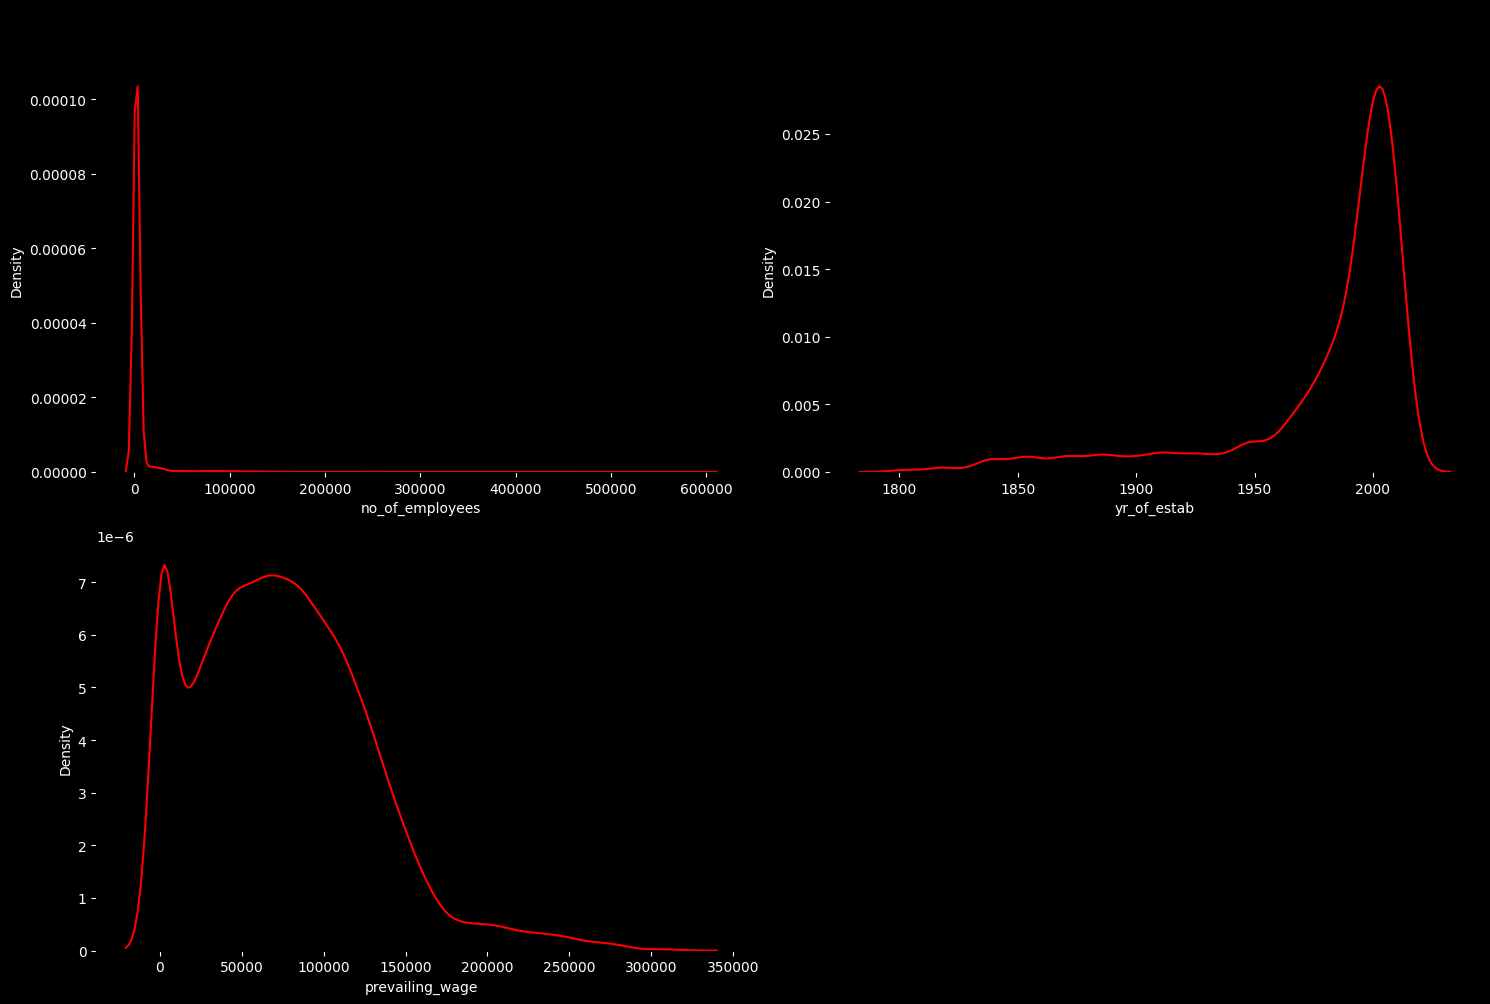

In [14]:
# Numerical features univariate analysis
plt.figure(figsize=(15, 10), facecolor='black')
plt.suptitle('Univariate analysis of numerical variables', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(len(numerical_features)):
    ax=plt.subplot(2, 2,i+1)
    sns.kdeplot(data=df[numerical_features[i]], color = 'red', )
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    ax.set_facecolor('black')
    
    # Change the color of the labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

In [15]:
# Insights
# Number of employees column is left skewed. This indicates the presence of outliers
# prevailing_wage is a right skewed column.

IndexError: list index out of range

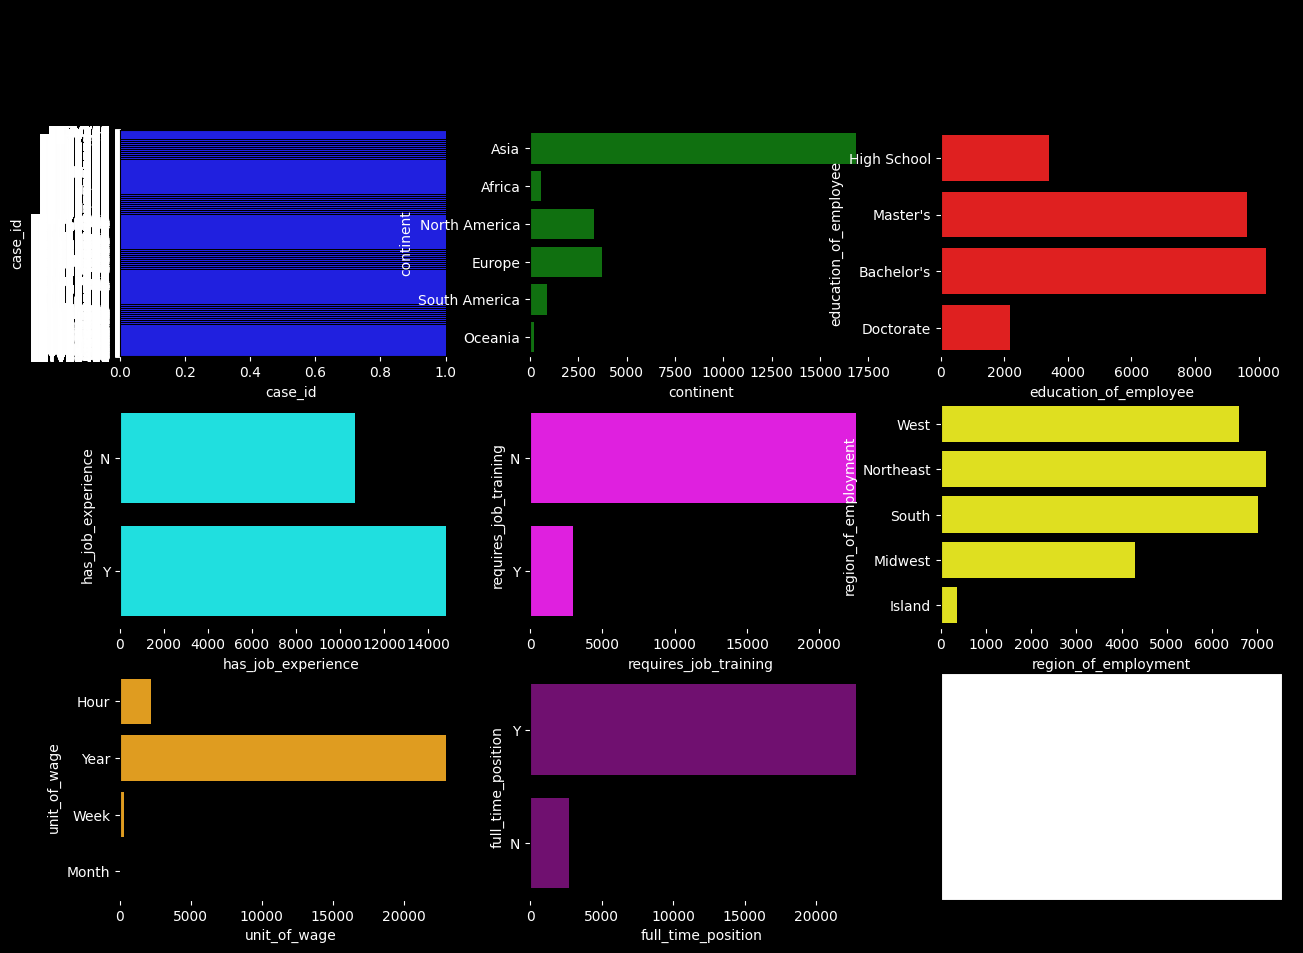

In [16]:
# Categorical features univariate analysis
# removing the case_id column as that is not needed as it only contains unique values
# categorical_features.remove('case_id') # This is a list therefore we are removing one element from the list

plt.figure(figsize=(15, 10), facecolor='black')
plt.suptitle("Univariate analysis of the categorical variables", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple']
for i in range(0,len(categorical_features)):
    ax = plt.subplot(3, 3, i+1)
    sns.countplot(data = df[categorical_features[i]],color = color[i])
    plt.xlabel(categorical_features[i])
    ax.set_facecolor('black')
    
    # Change the color of the labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')


In [49]:
# Insights
# require_job_training, unit_of_wage, full_time_position and continents have one of the categories which is dominating. This
# makes these columns imbalanced datasets
# Rest of the columns have a balance of categories

In [62]:
# Multivariate analysis
# Numerical variables can be of two types - discrete and continuious. Separating these two

discrete_features = [feature for feature in numerical_features if df[feature].nunique() <= 25]

continuous_features = [feature for feature in numerical_features if df[feature].nunique() >25]

print(f'There are {len(discrete_features)} discrete features amongst the numerical features namely {discrete_features}')
print(f'There are {len(continuous_features)} continuous features amongst the categorical features namely {continuous_features}')

There are 0 discrete features amongst the numerical features namely []
There are 3 continuous features amongst the categorical features namely ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [78]:
# Check for multicollinearity in numerical features
# Using Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif


calculate_vif(df.loc[:,numerical_features])

,features,VIF_Value
0,no_of_employees,1.061216
1,yr_of_estab,3.054392
2,prevailing_wage,2.987137


In [80]:
# Insights
# None of the VIF Values are greater than 5 for the numerical features. Therefore, there is no multicollinearity between
# numerical features

In [89]:
# Check multicollinearity in categorical variables
# Performing one hot encoding first and then checking VIF

one_hot_encoded_categorical_varianbles = pd.get_dummies(df[categorical_features], drop_first=True, dtype = int)
one_hot_encoded_categorical_varianbles

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1
25476,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
25477,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
25478,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1


In [97]:
calculate_vif(one_hot_encoded_categorical_varianbles)

,features,VIF_Value
0,continent_Asia,21.193348
1,continent_Europe,5.703096
2,continent_North America,4.761331
3,continent_Oceania,1.227756
4,continent_South America,1.992078
5,education_of_employee_Doctorate,1.268833
6,education_of_employee_High School,1.335114
7,education_of_employee_Master's,1.971756
8,has_job_experience_Y,2.487650
9,requires_job_training_Y,1.209973


In [148]:
one_hot_encoded_categorical_varianbles_copy = one_hot_encoded_categorical_varianbles
print(f'one_hot_encoded_categorical_varianbles_copy shape = {one_hot_encoded_categorical_varianbles_copy.shape}')
print(f'one_hot_encoded_categorical_varianbles shape = {one_hot_encoded_categorical_varianbles.shape}')

one_hot_encoded_categorical_varianbles_copy shape = (25480, 18)
one_hot_encoded_categorical_varianbles shape = (25480, 18)


In [149]:
# Choose a VIF Threshold
max_vif = 5

# Inititalize a flag to check if there are any variables existing which exceed the threshold
remove_flag = True

while remove_flag:
    vif = pd.DataFrame() # Initialise an empty dataframe
    vif['feature'] = one_hot_encoded_categorical_varianbles_copy.columns
    vif['VIF_Value'] = [variance_inflation_factor(one_hot_encoded_categorical_varianbles_copy.values, i) for i in range(one_hot_encoded_categorical_varianbles_copy.shape[1])]

    # Find the variable with highest VIF
    max_vif_feature = vif[vif['VIF_Value'] == max(vif['VIF_Value'])]
    #print(max_vif_feature)
    if max_vif_feature['VIF_Value'].max() > max_vif:
        # Remove the variable with highest VIF
        one_hot_encoded_categorical_varianbles_copy = one_hot_encoded_categorical_varianbles_copy.drop(max_vif_feature['feature'], axis =1)
        print(f'Removed variable with highest VIF: {max_vif_feature["feature"].max()} and VIF = {max_vif_feature["VIF_Value"] }')
    else:
        # If no variable exceeds the threshold, set the flag to False to exit the loop
        remove_flag = False

Removed variable with highest VIF: continent_Asia and VIF = 0    21.193348
Name: VIF_Value, dtype: float64
Removed variable with highest VIF: unit_of_wage_Year and VIF = 15    10.701221
Name: VIF_Value, dtype: float64
Removed variable with highest VIF: full_time_position_Y and VIF = 15    8.919778
Name: VIF_Value, dtype: float64


In [150]:
calculate_vif(one_hot_encoded_categorical_varianbles_copy)

,features,VIF_Value
0,continent_Europe,1.304814
1,continent_North America,1.194972
2,continent_Oceania,1.011943
3,continent_South America,1.051346
4,education_of_employee_Doctorate,1.263354
5,education_of_employee_High School,1.330381
6,education_of_employee_Master's,1.929124
7,has_job_experience_Y,2.375355
8,requires_job_training_Y,1.184922
9,region_of_employment_Midwest,1.555504


In [151]:
# Insights
# There are three features in categorical features created after performing one hot encoding which have a VIF greater than 5 and hence we
# can remove them to remove multicollinearity from data. The features are namely - continent_Asia, unit_of_wage_Year, and full_time_position_Y 

In [152]:
# Check for null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [153]:
# Insights
# There are no null values in the dataset

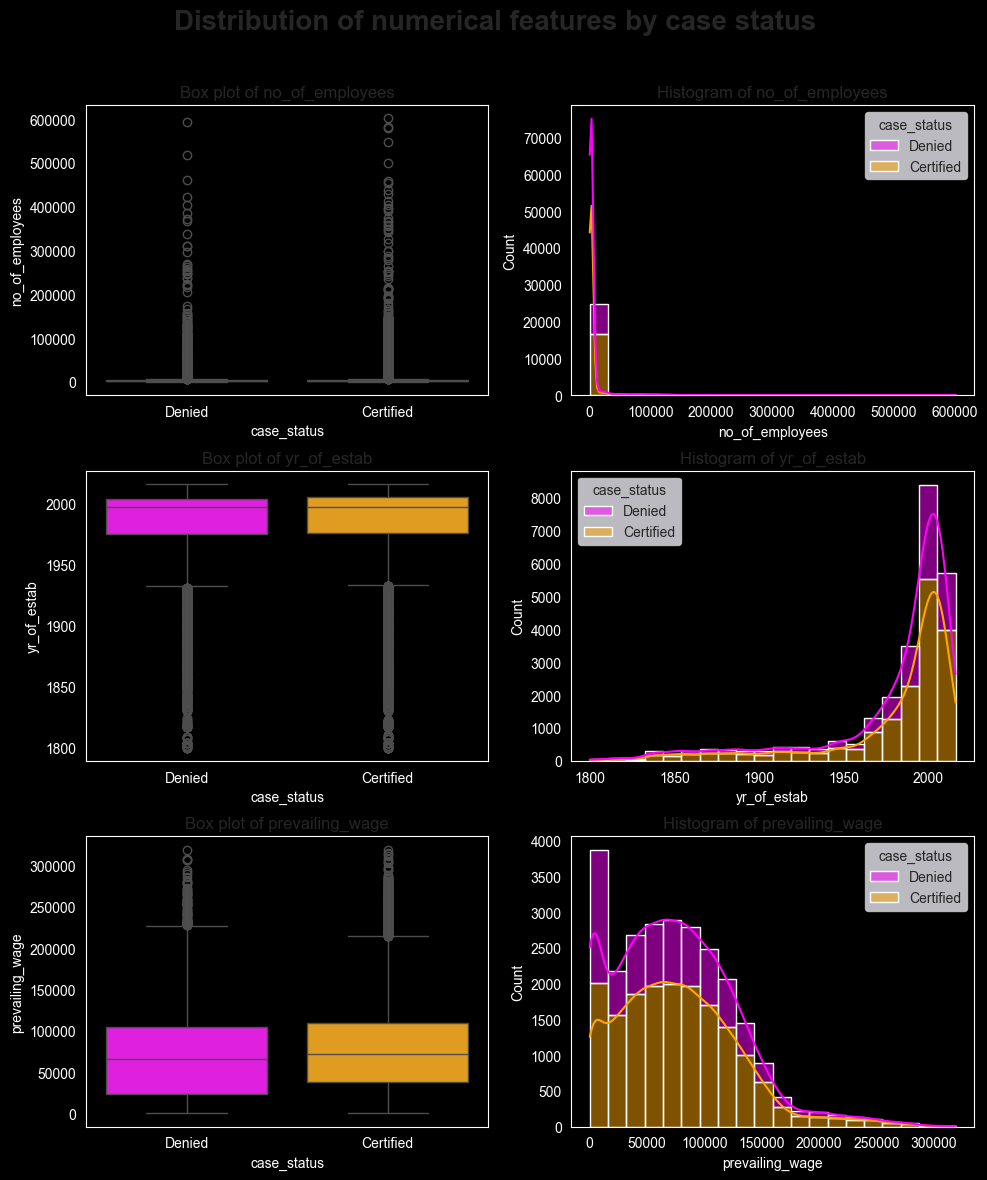

In [199]:
# Distribution of numerical features by case status
color = ['magenta','orange']
fig, ax = plt.subplots(3, 2, figsize = (10, 12), facecolor ='black')
fig.suptitle('Distribution of numerical features by case status', fontsize = 20, fontweight = 'bold')

for i, col in enumerate(continuous_features):
    sns.boxplot(data = df, x = 'case_status', y = col, palette=color, ax = ax[i, 0])
    ax[i, 0].set_title(f'Box plot of {col}', fontsize = 12)

    sns.histplot(data=df, x = col, palette=color, bins = 20, kde = True, multiple='stack', ax=ax[i, 1], hue='case_status')
    ax[i, 1].set_title(f'Histogram of {col}', fontsize = 12)
    ax[i,0].set_facecolor('black')
    ax[i,1].set_facecolor('black')

    ax[i,0].xaxis.label.set_color('white')
    ax[i,0].yaxis.label.set_color('white')
    ax[i,0].tick_params(axis='x', colors='white')
    ax[i,0].tick_params(axis='y', colors='white')

    ax[i,1].xaxis.label.set_color('white')
    ax[i,1].yaxis.label.set_color('white')
    ax[i,1].tick_params(axis='x', colors='white')
    ax[i,1].tick_params(axis='y', colors='white')

fig.tight_layout()
fig.subplots_adjust(top=0.90)

In [160]:
# Insights
# Number of employees has a lot of outliers which can be handled in feature engineering.
# no_of_employees column is right skewed
# yr_of_estab column is left skewed and some outliers lie below the lower bound of the box plot
# prevailing_wage is right_skewed with outliers above the upper bound of the box plot

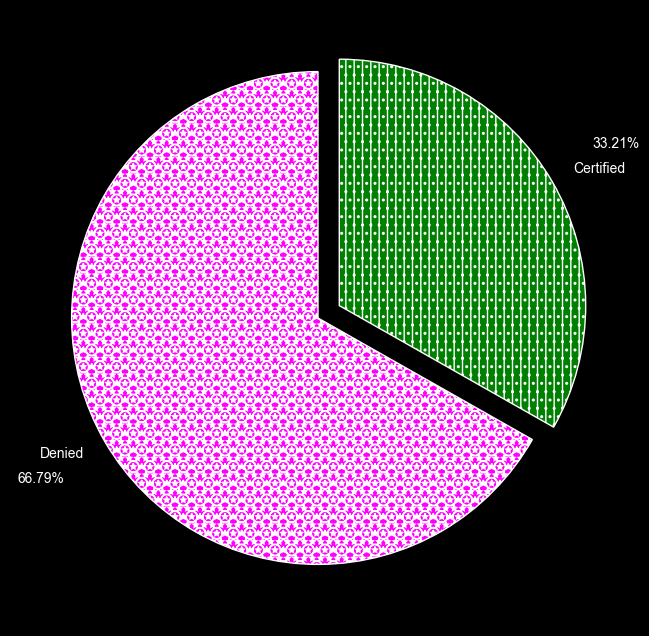

In [205]:
# Visuaize the target variable
case_status_percent = df['case_status'].value_counts(normalize=True)*100
labels = df['case_status'].unique()
fig, ax = plt.subplots(figsize=(15, 8), facecolor = 'black')
explode = (0, 0.1)
ax.pie(case_status_percent, labels = labels, autopct='%1.2f%%', explode=explode, startangle=90, colors=['magenta', 'green'], hatch=['**O', '.||.']
       , labeldistance=1.1, pctdistance=1.3, textprops={'color': 'white'})

plt.show()

In [ ]:
# Insights
# From the pie chart above it is clear that the Target variable is imbalanced dataset. Imbalanced datasets are those datasets where the
# target column has uneven distribution of observations. Here the proportion of denied status are double than that of the certified status. 

In [182]:
# Relationship between Continent and case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

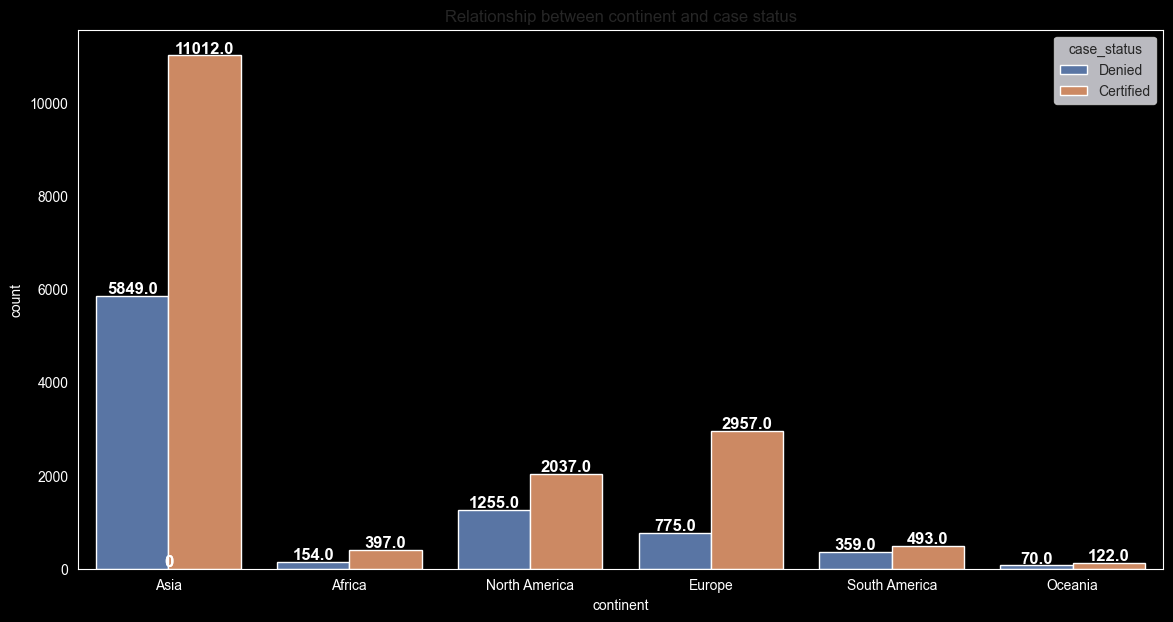

In [220]:
# visualizing the above data
fig, ax = plt.subplots(figsize = (14, 7), facecolor = 'black')
plt.title("Relationship between continent and case status")
sns.countplot(data=df, x='continent', hue = 'case_status', palette='deep')
ax.set_facecolor('black')
ax.tick_params(axis = 'x',colors= 'white')
ax.tick_params(axis = 'y',colors= 'white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

for p in ax.patches:
    ax.annotate(format(p.get_height()),  # The text to be displayed
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                ha = 'center', va = 'center',  # Horizontal and vertical alignment
                xytext = (0, 5),  # Offset the text above the bar
                textcoords = 'offset points',
                fontsize=12, color='white', weight='bold')

In [215]:
# Insights
# Most of the employees from Asia were given certified case_status
# In all the continents, the proportion of employees who were certified were more than who were denied. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Oceania')])

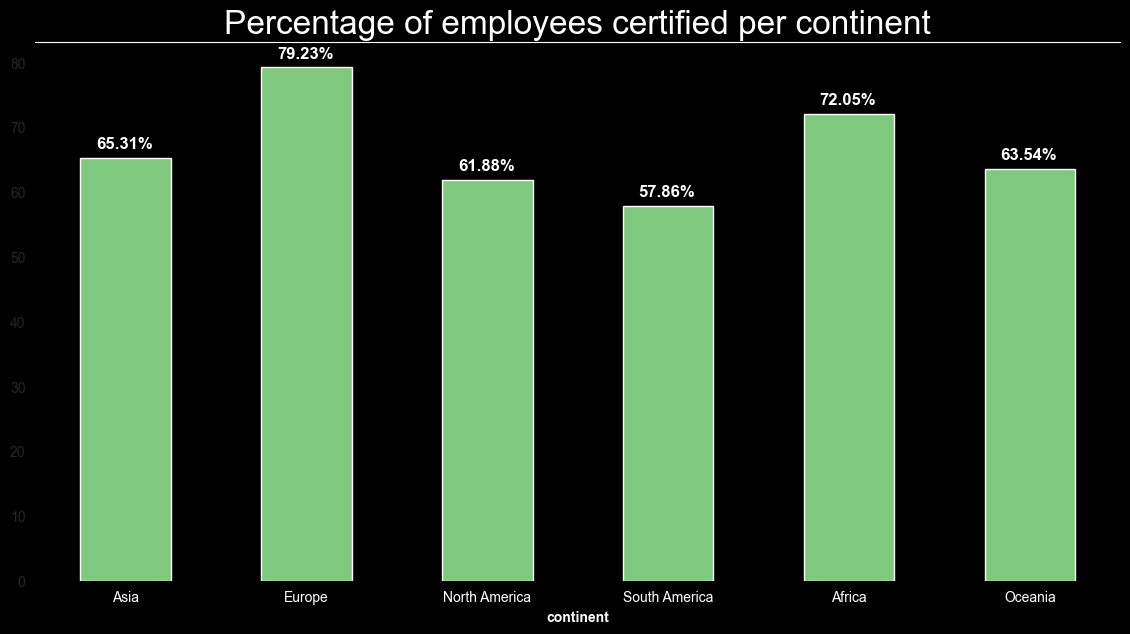

In [294]:
# checking the relationship between the percentage if people who got certified from each contient
certified_data = df[df['case_status'] == 'Certified']['continent'].value_counts()/df['continent'].value_counts() * 100



fig, ax = plt.subplots(figsize=(14, 7), facecolor = 'black')
certified_data.plot(kind='bar', stacked = True, colormap = 'Accent')
plt.title('Percentage of employees certified per continent', color = 'white', fontsize = 24)
ax.set_facecolor('black')
plt.xlabel('continent', color = 'white', fontweight = 'bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',  # Format height with 2 decimal places
                (p.get_x() + p.get_width() / 3., p.get_height()),  # Position of the text
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(10, 10),  # Offset the text above the bar
                textcoords='offset points',
                fontsize=12, color='white', weight='bold')

# ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis = 'x', colors = 'white')
plt.xticks(rotation = 0)


In [271]:
# Insights
# Most of the applicants from Europe are certified. 
# The percentage of applications from Africa who get the certified status is close to Europe. 

In [273]:
# Does applicant education have any impact on the visa status?

df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()

proportion
education_of_employee case_status            
Bachelor's            Certified      0.622142
                      Denied         0.377858
Doctorate             Certified      0.872263
                      Denied         0.127737
High School           Denied         0.659649
                      Certified      0.340351
Master's              Certified      0.786278
                      Denied         0.213722

Text(0.5, 1.0, 'Education of emloyee vs visa status')

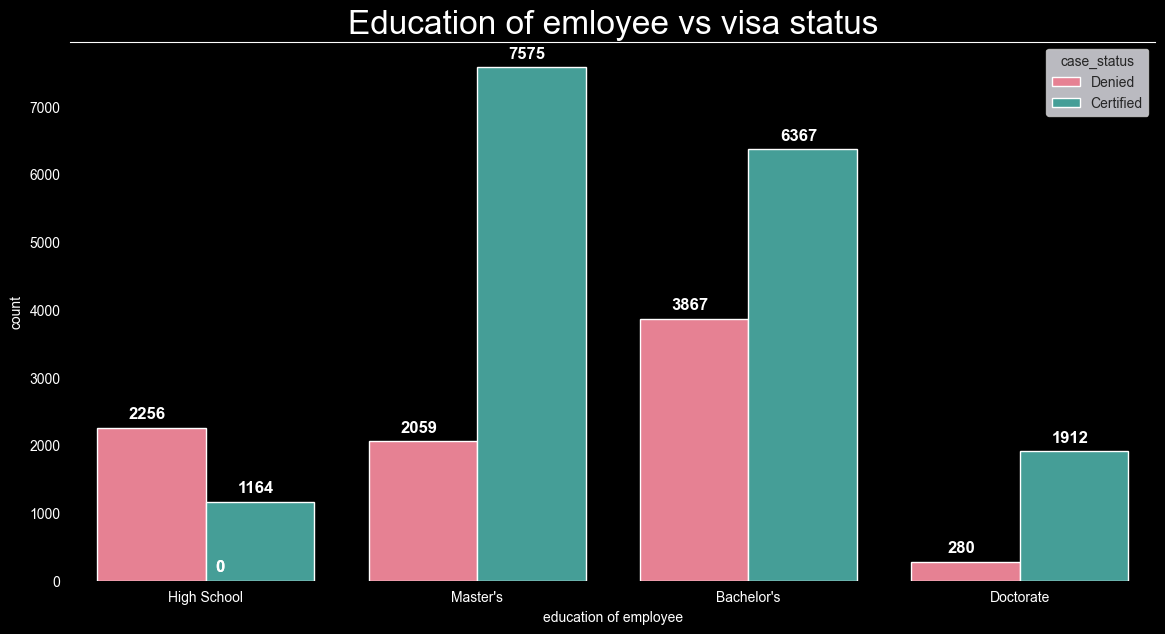

In [293]:
# visualizing above data

fig, ax = plt.subplots(figsize=(14, 7), facecolor = 'black')
ax.set_facecolor('black')
sns.countplot(data = df, hue = 'case_status', x = 'education_of_employee', palette='husl')
plt.xlabel('education of employee', color = 'white')
plt.ylabel('count', color = 'white')
ax.tick_params(colors = 'white')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), # Format height with zero decimal places
                (p.get_x() + p.get_width()/3., p.get_height()), # Get the position of text
                ha = 'center', va = 'center', # horizontal and vertical alignment
                xytext = (10, 10), # Offset the text above the bar
                textcoords='offset points',
                fontsize = 12, color = 'white', weight = 'bold'
                )
#ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Education of emloyee vs visa status', color = 'white', fontsize =24)

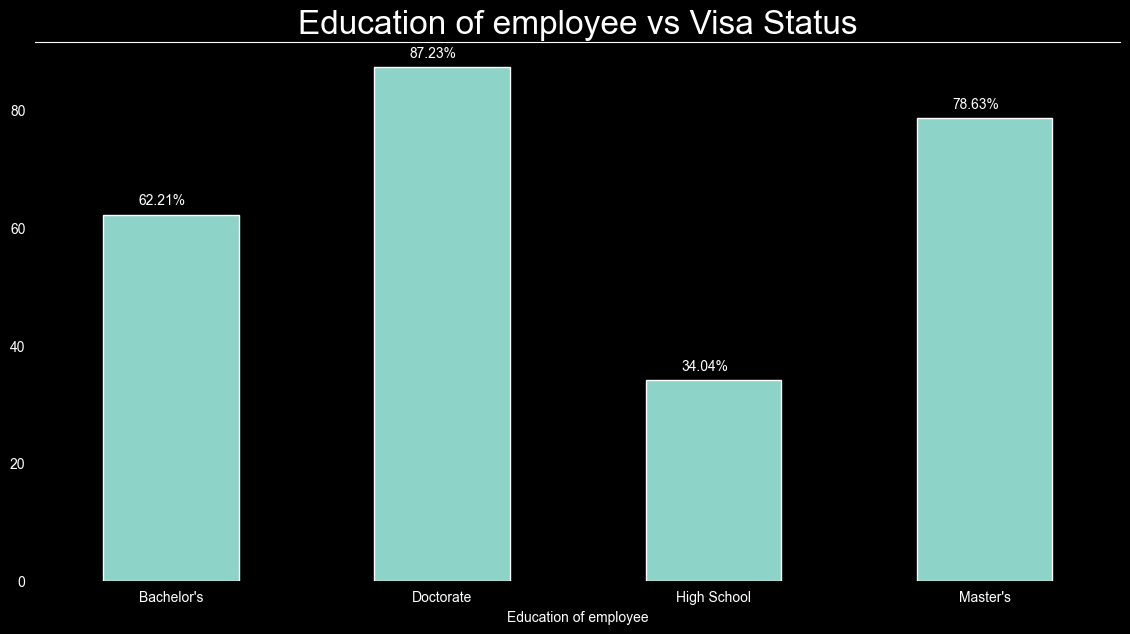

In [316]:
# Percent of certified visa vs education of applicant

certified_data = (df[df['case_status'] == 'Certified']['education_of_employee'].value_counts()/df['education_of_employee'].value_counts()) * 100

fig, ax = plt.subplots(figsize = (14, 7), facecolor = 'black')
ax.set_facecolor('black')
certified_data.plot(kind = 'bar', x = 'education_of_employee', colormap = 'Set3')
plt.xlabel('Education of employee', color = 'white')
ax.tick_params(colors = 'white')
plt.xticks(rotation = 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
    (p.get_x() + p.get_width()/3., p.get_height()),
    ha = 'center', va = 'center',
    xytext = (10, 10),
    textcoords = 'offset points',
    color = 'white',
    )
plt.title("Education of employee vs Visa Status", color = 'white', fontsize = 24)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [317]:
# Insights
# Applicants who have completed Doctorate or Masters degree are more likely to get their visa approved than others.

In [319]:
# Does the applicant's previous work experience have any impact on Visa status?
df.groupby('has_job_experience')['case_status'].value_counts(normalize = True) * 100

has_job_experience  case_status
N                   Certified      56.134108
                    Denied         43.865892
Y                   Certified      74.476422
                    Denied         25.523578
Name: proportion, dtype: float64

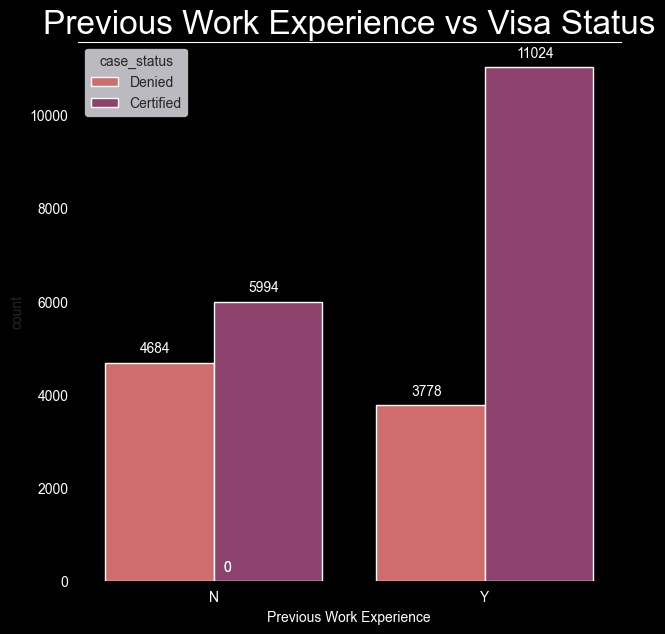

In [347]:
# Visualizing above data

fig, ax = plt.subplots(figsize = (7, 7), facecolor = 'black')
ax.set_facecolor('black')
plt.title("Previous Work Experience vs Visa Status", color = 'white', fontsize = 24)
sns.countplot(data = df, x = 'has_job_experience', hue = 'case_status', palette = 'flare')
plt.xlabel('Previous Work Experience', color = 'white')
ax.tick_params(colors = 'white')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width()/3., p.get_height()),
    ha = 'center', va = 'center',
    xytext=(10, 10), 
    textcoords = 'offset points',
    color = 'white')

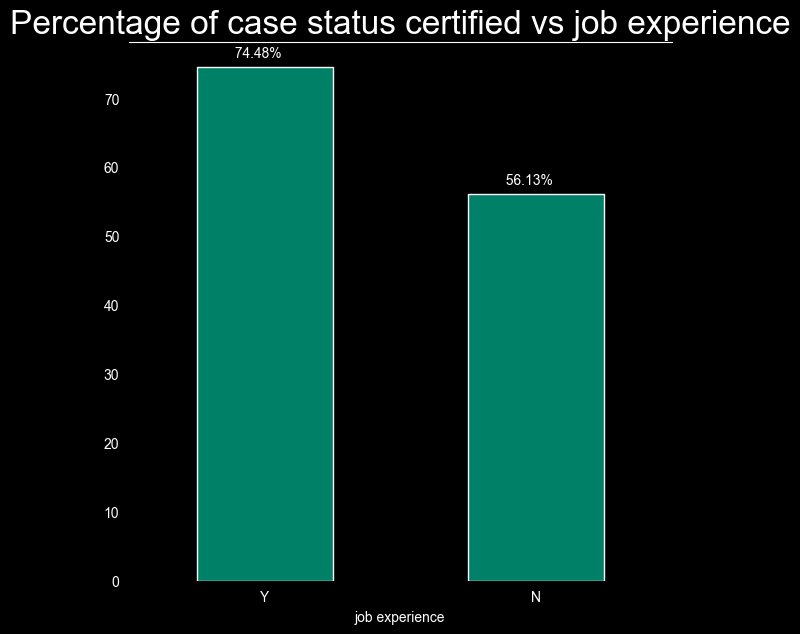

In [369]:
# Percentage of certified status vs job experience
certified_data_job = (df[df['case_status'] == 'Certified']['has_job_experience'].value_counts()/df['has_job_experience'].value_counts()) * 100
fig, ax = plt.subplots(figsize=(7, 7), facecolor = 'black')
ax.set_facecolor('black')
certified_data_job.plot(kind = 'bar', colormap = 'summer')
plt.xlabel('job experience', color = 'white')
plt.title('Percentage of case status certified vs job experience', fontsize = 24, color ='white')

ax.tick_params(colors = 'white')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation = 0)

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .2f}%',
                (p.get_x()+p.get_width()/3., p.get_height()),
                ha='center', va = 'center',
                xytext = (10, 10),
                textcoords = 'offset points',
                color = 'white'
                )



In [370]:
# Insights
# People with previous work experience have more chance of their visa being accepted than those who do not have a job experience. 
# If you do not have work experience then there is almost 50-50 chance of your visa being accepted or rejected

In [371]:
# Impact of an employee requring job training on the visa status
df.groupby('requires_job_training')['case_status'].value_counts(normalize = True) * 100

requires_job_training  case_status
N                      Certified      66.645949
                       Denied         33.354051
Y                      Certified      67.884941
                       Denied         32.115059
Name: proportion, dtype: float64

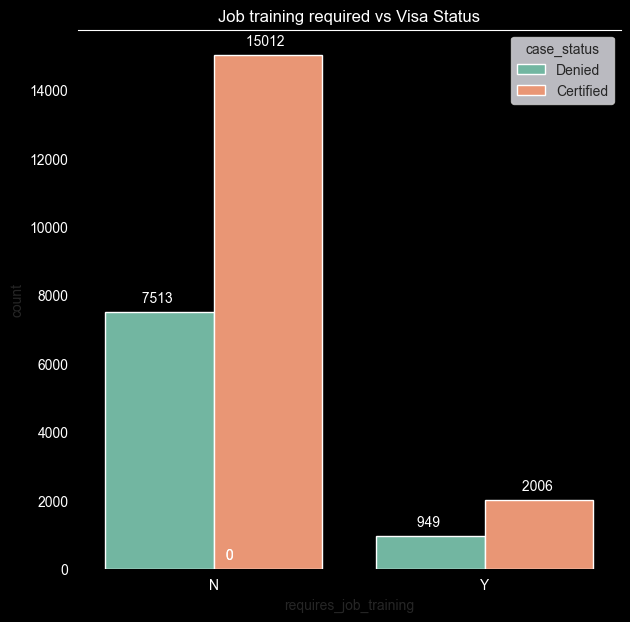

In [379]:
fig, ax = plt.subplots(figsize = (7, 7), facecolor = 'black')
ax.set_facecolor('black')

sns.countplot(data=df, hue = 'case_status', x = 'requires_job_training', palette = 'Set2')
plt.title('Job training required vs Visa Status', color = 'white')

ax.tick_params(colors = 'white')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .0f}',
                (p.get_x() + p.get_width()/3., p.get_height()),
                ha = 'center', va= 'center',
                xytext = (10, 10),
                textcoords = 'offset points',
                color = 'white'
                )

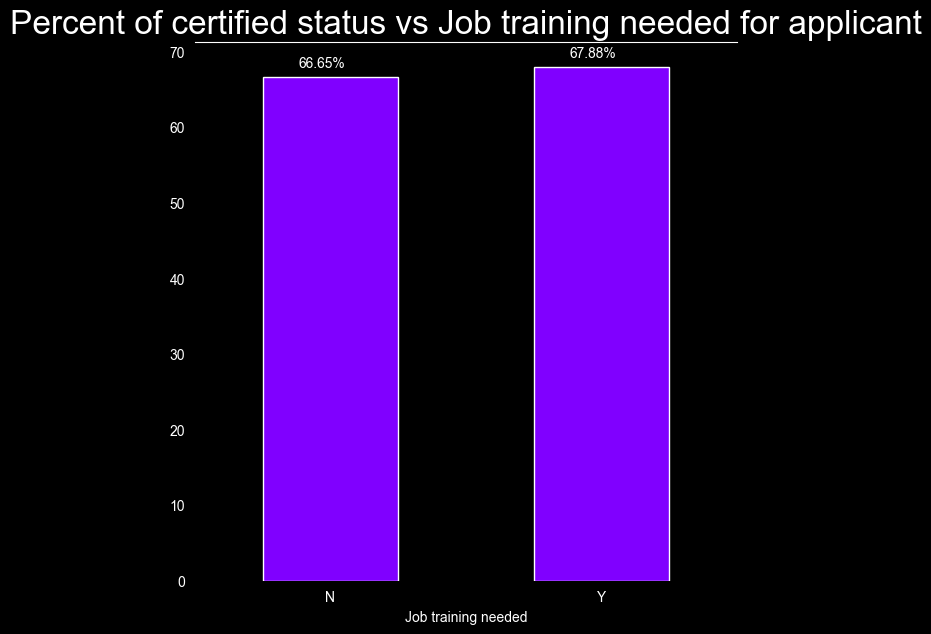

In [394]:
# Percentage of certified visa status vs required training
certified_data_training = (df[df['case_status'] == 'Certified']['requires_job_training'].value_counts()/df['requires_job_training'].value_counts()) * 100

fig, ax = plt.subplots(figsize=(7,7), facecolor = 'black')

ax.set_facecolor('black')
ax.tick_params(colors = 'white')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

certified_data_training.plot(kind = 'bar', colormap = 'rainbow')
plt.xticks(rotation = 0)
plt.title('Percent of certified status vs Job training needed for applicant', color = 'white', fontsize = 24)

plt.xlabel('Job training needed', color = 'white')

for p in ax.patches:
    ax.annotate( f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width()/3., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (10, 10),
                textcoords = 'offset points',
                color = 'white'
                )


In [395]:
# Insights
# There is no impact on case status if the applicant requires training or not.
# This field does not have much impact on the target variable so we can exclude this from our analysis

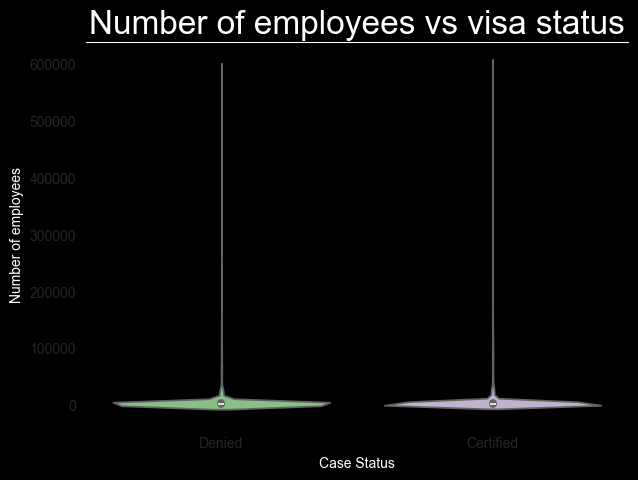

In [402]:
# Does the number of employees have an impact on the visa status?

fig, ax = plt.subplots(figsize = (7, 5), facecolor = 'black')
ax.set_facecolor('black')

sns.violinplot(x = 'case_status', y = 'no_of_employees', data = df, palette = 'Accent')
plt.xlabel('Case Status', color = 'white')
plt.ylabel('Number of employees', color = 'white')
plt.title('Number of employees vs visa status', color = 'white', fontsize = 24)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [403]:
# Insights
# Both distributions are similar. however there are large number of outliers present which will need to be handled. 

In [404]:
# Impact of the type of wage on visa status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize = True) * 100

unit_of_wage  case_status
Hour          Denied         65.368567
              Certified      34.631433
Month         Certified      61.797753
              Denied         38.202247
Week          Certified      62.132353
              Denied         37.867647
Year          Certified      69.885027
              Denied         30.114973
Name: proportion, dtype: float64

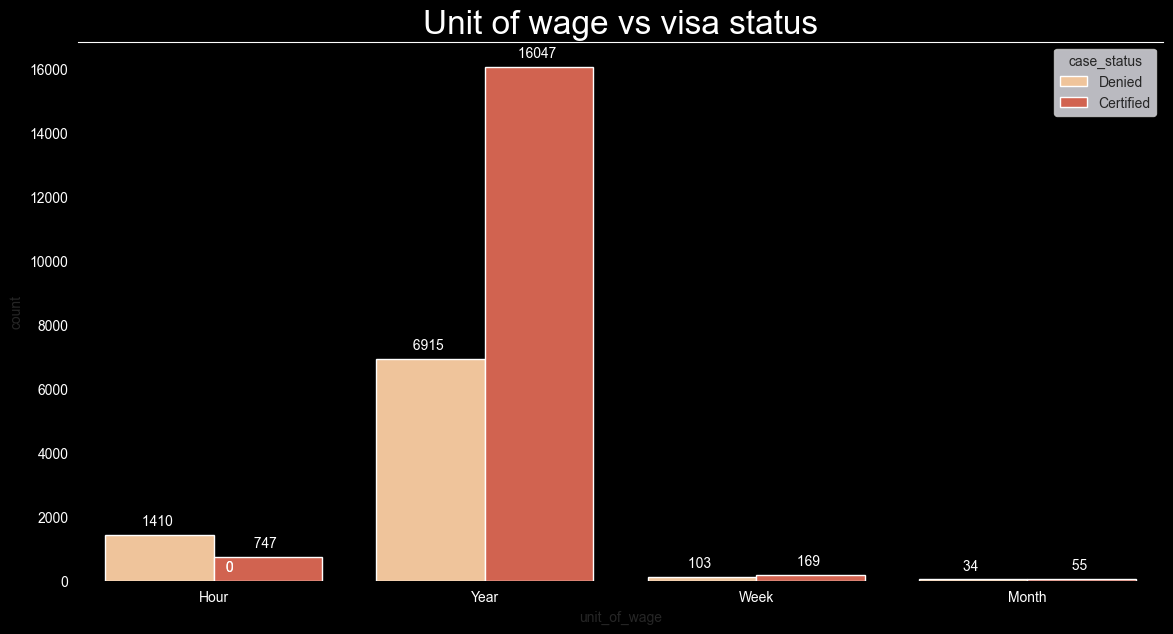

In [410]:
# Plotting the above data

fig, ax = plt.subplots(figsize=(14, 7), facecolor = 'black')
ax.set_facecolor('black')
sns.countplot(data = df, x = 'unit_of_wage', hue = 'case_status', palette = 'OrRd')
ax.tick_params(colors = 'white')
plt.title('Unit of wage vs visa status', color = 'white', fontsize = 24)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .0f}',
                (p.get_x() + p.get_width()/3., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (10, 10),
                textcoords = 'offset points',
                color = 'white' 
               )

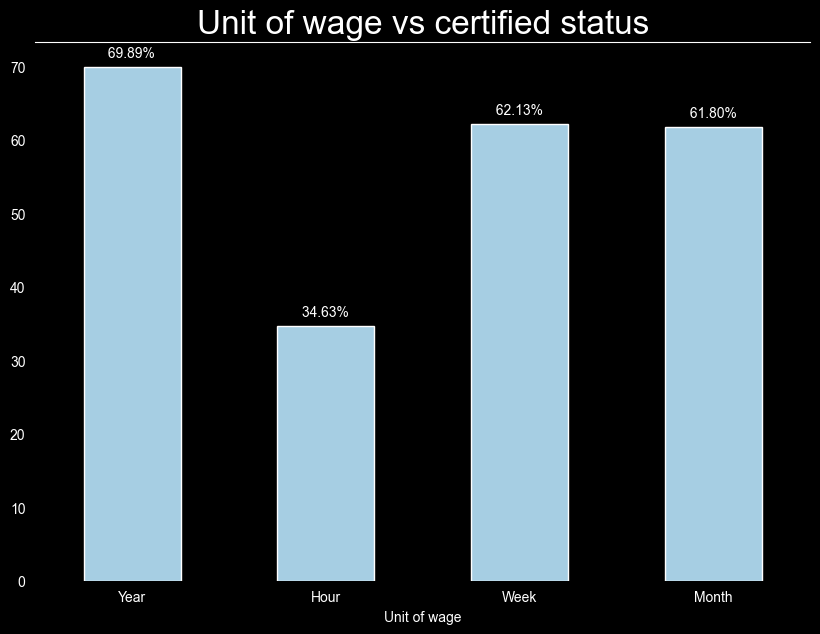

In [428]:
# Impact of wage for applicant who have been certified
certified_data_wage = (df[df['case_status'] == 'Certified']['unit_of_wage'].value_counts()/df['unit_of_wage'].value_counts()) * 100

fig, ax = plt.subplots(figsize = (10, 7), facecolor = 'black')
ax.set_facecolor('black')

certified_data_wage.plot(kind = 'bar', colormap = 'Paired')
plt.title('Unit of wage vs certified status', color = 'white', fontsize = 24)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(colors = 'white')
plt.xticks(rotation = 0)
plt.xlabel('Unit of wage', color = 'white')

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .2f}%',
               (p.get_x() + p.get_width()/3., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (10, 10), 
               textcoords = 'offset points', 
               color = 'white' 
               )

In [429]:
# Insights
# Majority of the employees who have hourly pay get denied. 
# Rest all the other wage types have an equal probability of getting accepted. 

In [17]:
# Does region of employment has an impact on the visa status
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True)*100

region_of_employment  case_status
Island                Certified      60.266667
                      Denied         39.733333
Midwest               Certified      75.528210
                      Denied         24.471790
Northeast             Certified      62.904795
                      Denied         37.095205
South                 Certified      70.015676
                      Denied         29.984324
West                  Certified      62.253265
                      Denied         37.746735
Name: proportion, dtype: float64

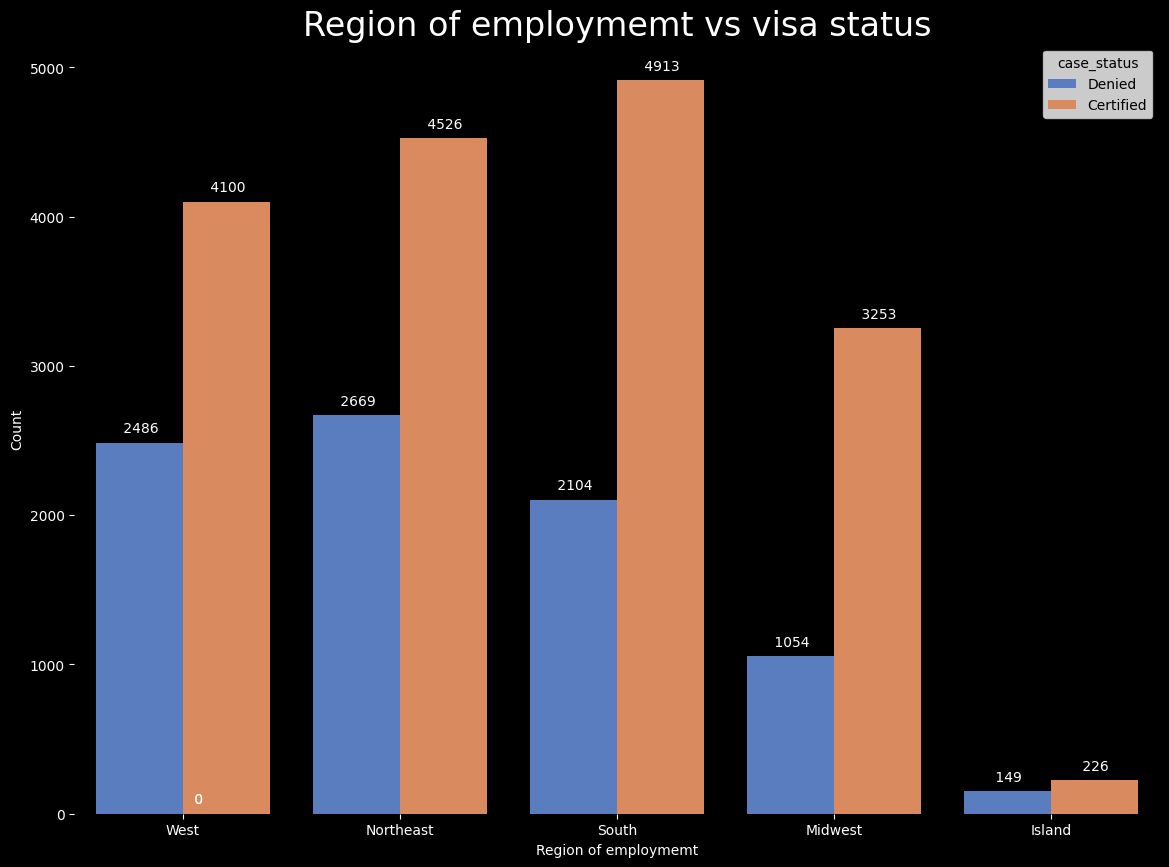

In [41]:
# visualizing above data
fig, ax = plt.subplots(figsize = (14, 10), facecolor = 'black')
ax.set_facecolor('black')
sns.countplot(data = df, x = 'region_of_employment', hue = 'case_status', palette='muted')
plt.title('Region of employmemt vs visa status', color = 'white', fontsize = 24)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Region of employmemt', color = 'white')
plt.ylabel('Count', color= 'white')
ax.tick_params(colors = 'white')

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .0f}',
                (p.get_x() + p.get_width()/3., p.get_height()),
                xytext = (10, 10),
                ha = 'center', va = 'center',
                textcoords = 'offset points',
                color = 'white'
                )   

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Island'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'South'),
  Text(4, 0, 'West')])

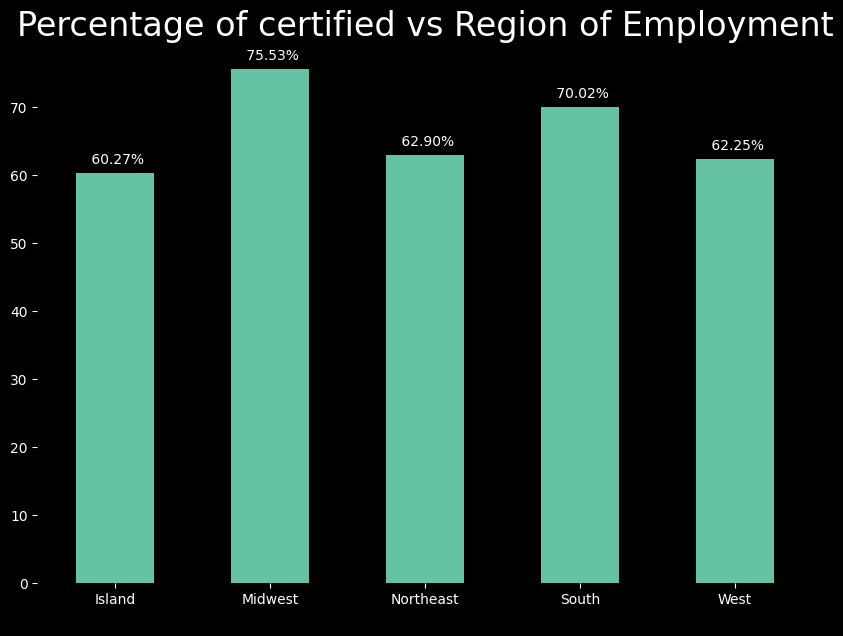

In [49]:
# Percentage of certified vs employment
certified_region = (df[df['case_status'] == 'Certified']['region_of_employment'].value_counts()/df['region_of_employment'].value_counts())*100
fig, ax = plt.subplots(figsize = (10, 7), facecolor = 'black')
ax.set_facecolor('black')
certified_region.plot(x = 'region_of_employment', kind = 'bar', colormap = 'Set2')
plt.title('Percentage of certified vs Region of Employment', color = 'white', fontsize = 24)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(colors = 'white')

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .2f}%',
                (p.get_x()+p.get_width()/3., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (10, 10),
                textcoords='offset points',
                color = 'white'
                )
plt.xticks(rotation = 0)

In [50]:
# Insights
# There seems to be not much impact on the region of employment on the visa status. 
# Midwest and South have a slight edge compared to others. 

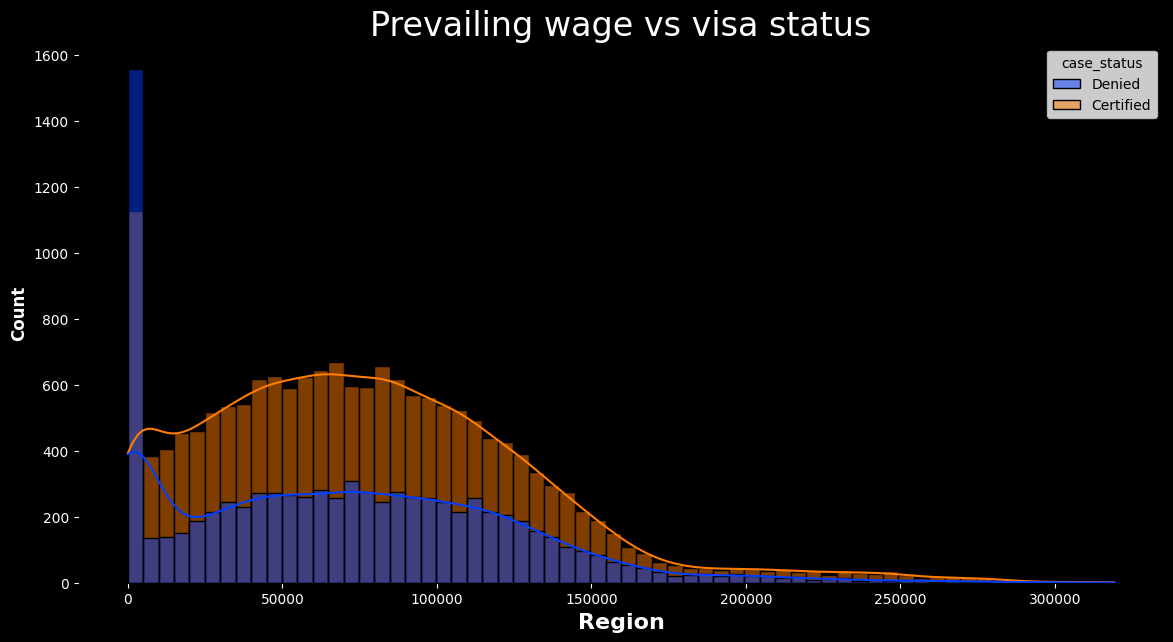

In [58]:
# Does prevailing wage has an impact on the visa status

fig, ax = plt.subplots(figsize = (14, 7), facecolor = 'black')
ax.set_facecolor('black')
sns.histplot(data = df, hue = 'case_status', x = 'prevailing_wage', kde = True, palette='bright')
plt.title('Prevailing wage vs visa status', color = 'white', fontsize = 24)
plt.xlabel('Region', weight = 'bold', fontsize = 16, color = 'white')
plt.ylabel('Count', weight = 'bold', fontsize = 12, color = 'white')
ax.tick_params(colors = 'white')
plt.show()

In [59]:
# Insights
# The distribution of both the classes is same but will need to handle outliers

In [63]:
# average Prevailing wage base on education
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending = False)

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


Text(0, 0.5, 'Education of employee')

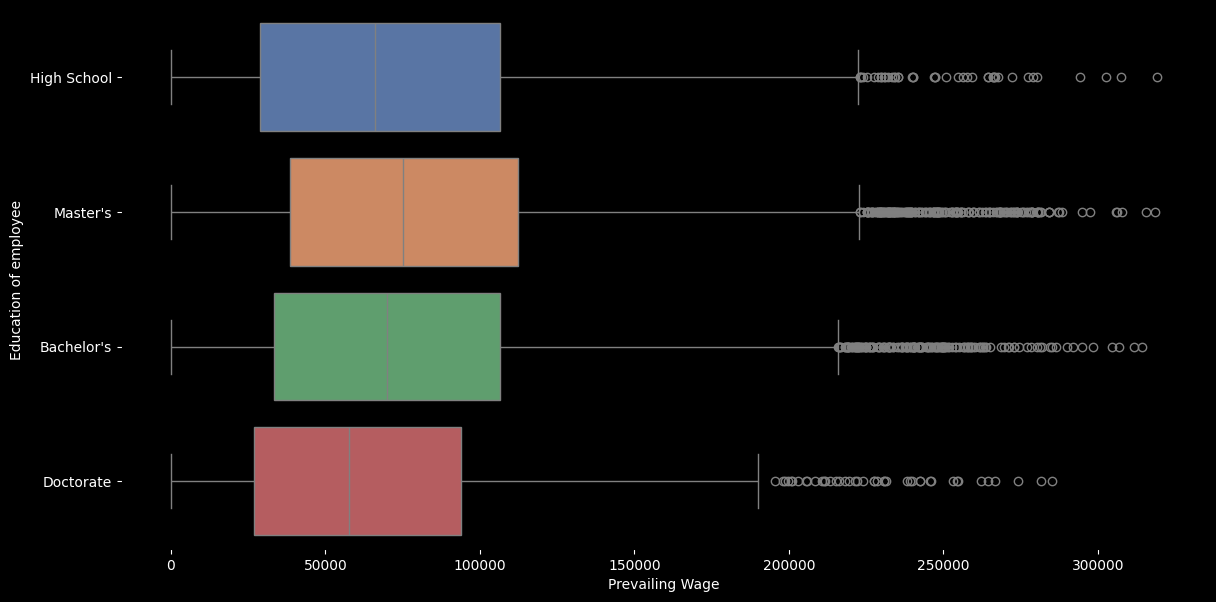

In [79]:
fig, ax = plt.subplots(figsize = (14, 7), facecolor = 'black')
ax.set_facecolor('black')
sns.boxplot(data=df, x = 'prevailing_wage', y = 'education_of_employee', palette='deep', linecolor='grey')
ax.tick_params(colors = 'white')
plt.xlabel('Prevailing Wage', color = 'white')
plt.ylabel('Education of employee', color = 'white')

In [68]:
# Insights
# Applicant's having Masters degree have a hgher prevailing wage as compared to others

In [70]:
# Median Prevailing wage based on job experience
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)

,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


In [71]:
# Insights@
# Surprisingly, people who have no job experience have better prevailing wage.

In [72]:
# Prevailing job experience based on continent
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by ='prevailing_wage', ascending=False)

,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


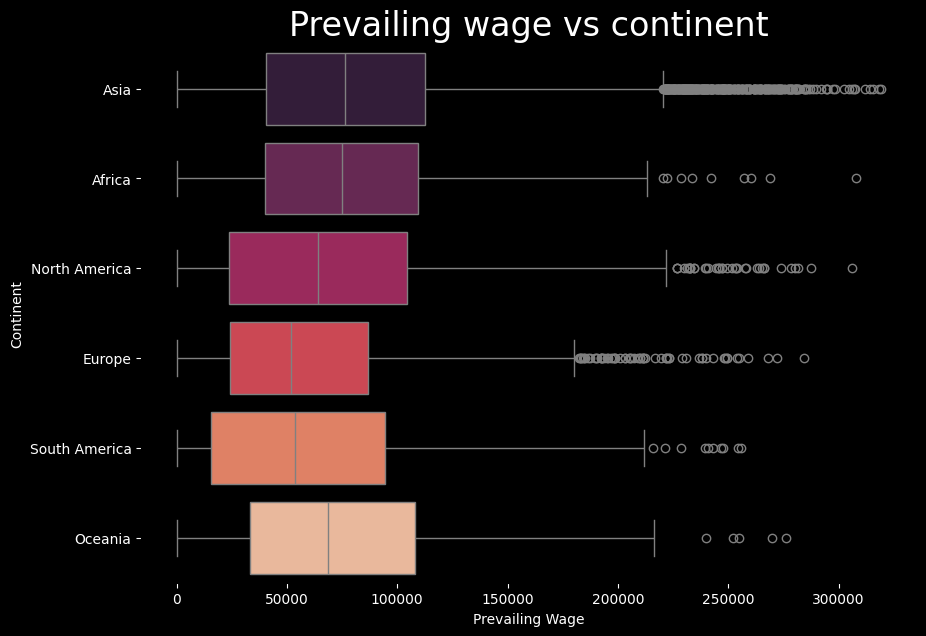

In [80]:
fig, ax = plt.subplots(figsize = (10, 7), facecolor = 'black')
ax.set_facecolor('black')
sns.boxplot(data =df, x = 'prevailing_wage', y = 'continent', palette='rocket', linecolor='grey')
plt.title('Prevailing wage vs continent', color = 'white', fontsize = 24)
plt.xlabel('Prevailing Wage', color = 'white')
plt.ylabel('Continent', color = 'white')
ax.tick_params(colors = 'white')

In [81]:
# Insights
# Average Salary for people from Asia is higher than others

Text(0, 0.5, 'Count')

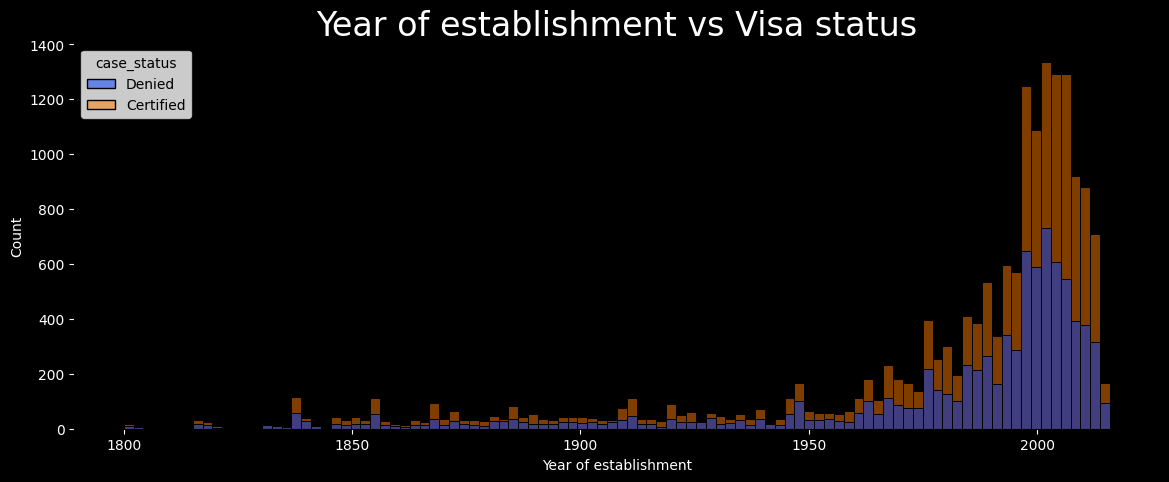

In [90]:
# Year of establishment 
fig, ax = plt.subplots(figsize=(14, 5), facecolor = 'black')
ax.set_facecolor('black')
sns.histplot(data =df, x = 'yr_of_estab', palette='bright', hue = 'case_status', bins = 100)
plt.title('Year of establishment vs Visa status', color = 'white', fontsize = 24)
ax.tick_params(colors = 'white')
plt.xlabel('Year of establishment', color = 'white')
plt.ylabel('Count', color = 'white')

In [91]:
# Insights
# Most of the companies are established after 1950

In [92]:
# Final Report
# case_id column can be dropped as it is an ID and contains all the unique values
# requires_job_training column can be dropped as it doesn't have much impact on target variable
# no_of_employees, prevailing_wage columns have outllier which should be handled.
# continent columns has few unique values with very less count, which can be made as others
# Target column case_status is imbalanced can be handled before model building.